In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [2]:
# dataset x is features and y is target value
df=pd.read_csv('housing.csv')
trans = MinMaxScaler()
df = trans.fit_transform(df)
df=pd.DataFrame(df,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','target'])
y=df['target']
x=df[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13']]
#trans = MinMaxScaler()
#x = trans.fit_transform(x)
#y = trans.fit_transform(y)

In [30]:
def polyRegression(x,y,cvCost1,trainCost1,cvCost2,trainCost2,cvCost3,trainCost3,cvCost4,trainCost4,cvCost5,trainCost5):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
   
    x_cv,x_test,y_cv,y_test=train_test_split(x_test,y_test,test_size=0.5)
    
    i=1
    cvCost=[]
    trainCost=[]
   
    X=[1,2,3,4,5]
    while i<6:
    
        poly = PolynomialFeatures(degree=i, include_bias=True)
        poly_features = poly.fit_transform(x_train)
        poly_reg_model = LinearRegression()
        poly_reg_model.fit(poly_features, y_train)
        y_predicted = poly_reg_model.predict(poly_features)
        cvfitted=poly.fit_transform(x_cv)
        test=poly_reg_model.predict(cvfitted)
        cverror=mean_squared_error(y_cv, test)
        trainerror= mean_squared_error(y_train, y_predicted)
        cvCost.append(cverror)
        trainCost.append(trainerror)
        testfitted=poly.fit_transform(x_test)
        y_testpredict=poly_reg_model.predict(testfitted)
        RScore=r2_score(y_test,y_testpredict)
        print("R2 score for test data of degree: "+ str(i)+" is "+ str(RScore))
        if i==1:
            
            cvCost1.append(cverror)
            trainCost1.append(trainerror)
        elif i==2:
            cvCost2.append(cverror)
            trainCost2.append(trainerror)
        elif i==3:
            cvCost3.append(cverror)
            trainCost3.append(trainerror)
        elif i==4:
            cvCost4.append(cverror)
            trainCost4.append(trainerror)
        else:
            cvCost5.append(cverror)
            trainCost5.append(trainerror)
            
        i=i+1
    plt.plot(X, cvCost, X, trainCost)
    plt.show()
    print("CVCost: ")
    print(cvCost)
    print("TrainCost:")
    print(trainCost)
    return cvCost1,trainCost1,cvCost2,trainCost2,cvCost3,trainCost3,cvCost4,trainCost4,cvCost5,trainCost5

R2 score for test data of degree: 1 is 0.7380337513195359
R2 score for test data of degree: 2 is 0.7595131251721952
R2 score for test data of degree: 3 is -24.931165805751903
R2 score for test data of degree: 4 is -3.7490549327875593
R2 score for test data of degree: 5 is -1.2769731137297633


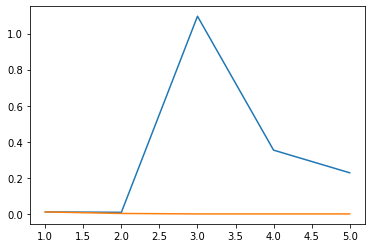

CVCost: 
[0.011128295431587009, 0.008902166473373758, 1.0961249594000617, 0.35366432644055046, 0.22808573058260562]
TrainCost:
[0.011028781171285605, 0.0025178138829562136, 1.106575231646371e-27, 1.6268635782986263e-28, 4.9943746060920284e-29]
R2 score for test data of degree: 1 is 0.729076313532071
R2 score for test data of degree: 2 is 0.601849337402325
R2 score for test data of degree: 3 is -3.9479787477689294
R2 score for test data of degree: 4 is -2.1695111419856734
R2 score for test data of degree: 5 is -1.72791895840798


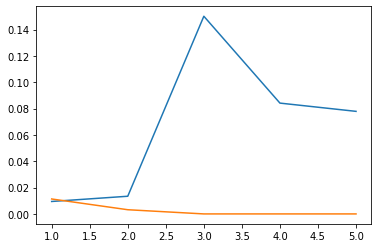

CVCost: 
[0.009448962046045638, 0.013418505862312611, 0.15010266004048511, 0.0841469945602699, 0.07788093310756966]
TrainCost:
[0.011341483953939862, 0.00318192500650788, 1.4850119623881671e-27, 1.0124233680180415e-28, 2.3968301764031473e-29]
R2 score for test data of degree: 1 is 0.7020601667766135
R2 score for test data of degree: 2 is 0.42696768320636147
R2 score for test data of degree: 3 is -9.255676993621968
R2 score for test data of degree: 4 is -2.4498676870988065
R2 score for test data of degree: 5 is -1.759467892295274


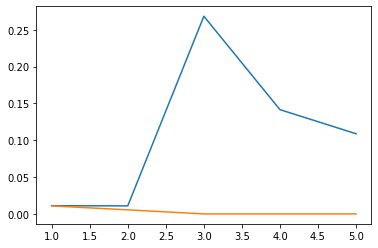

CVCost: 
[0.011173816463041091, 0.010901564890002725, 0.2682840441733645, 0.14153381429833453, 0.10881852897300258]
TrainCost:
[0.01089877750011548, 0.005519188862245599, 9.095241118612558e-26, 9.479333877192841e-29, 1.1616088444329312e-28]
R2 score for test data of degree: 1 is 0.7137693794570319
R2 score for test data of degree: 2 is 0.8507595404259233
R2 score for test data of degree: 3 is -7.030367209311386
R2 score for test data of degree: 4 is -2.1365717278851966
R2 score for test data of degree: 5 is -1.5025930652324768


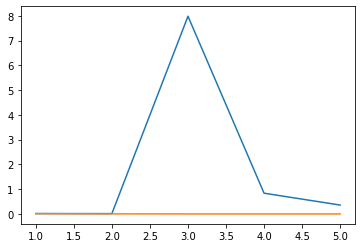

CVCost: 
[0.014678631656558756, 0.012181121882337647, 7.985424591338429, 0.8367578800828824, 0.3581960281252866]
TrainCost:
[0.010018573479380967, 0.002129394388722697, 6.354733109074716e-28, 2.2275466993689334e-28, 5.064614097470408e-29]
R2 score for test data of degree: 1 is 0.8024006274430382
R2 score for test data of degree: 2 is 0.7323099310381089
R2 score for test data of degree: 3 is -24.047214968484838
R2 score for test data of degree: 4 is -4.090183749045967
R2 score for test data of degree: 5 is -2.4236668780152195


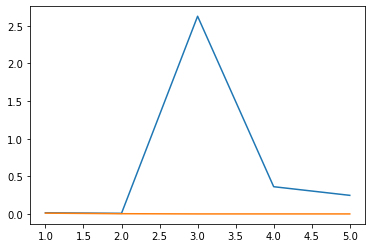

CVCost: 
[0.015252050360291008, 0.0075731983517013735, 2.6283271384936597, 0.3617716244652916, 0.24691628028540286]
TrainCost:
[0.010348964883870911, 0.0027728970346126945, 9.929988075511946e-26, 1.1139529347065253e-28, 5.631725653566226e-29]


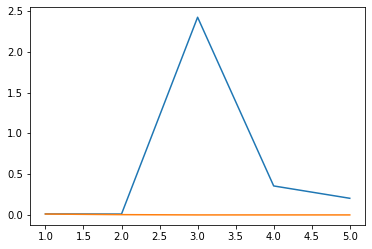

In [32]:
#polynomial of degree two showed the best results on cv error
cvCost1=[]
trainCost1=[]
cvCost2=[]
trainCost2=[]
cvCost3=[]
trainCost3=[]
cvCost4=[]
trainCost4=[]
cvCost5=[]
trainCost5=[]
X=[1,2,3,4,5]
bibz=0
while bibz<5:
    bibz+=1
    [c1,t1,c2,t2,c3,t3,c4,t4,c5,t5]=polyRegression(x,y,cvCost1,trainCost1,cvCost2,trainCost2,cvCost3,trainCost3,cvCost4,trainCost4,cvCost5,trainCost5)
    
c1=sum(c1)/5
t1=sum(t1)/5
c2=sum(c2)/5
t2=sum(t2)/5
c3=sum(c3)/5
t3=sum(t3)/5
c4=sum(c4)/5
t4=sum(t4)/5
c5=sum(c5)/5
t5=sum(t5)/5
c=[c1,c2,c3,c4,c5]
t=[t1,t2,t3,t4,t5]
plt.plot(X, c, X, t)
plt.show()

In [15]:
def RidgeRegr(i,x,y):
    trans = MinMaxScaler()
    x = trans.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
    x_cv,x_test,y_cv,y_test=train_test_split(x_test,y_test,test_size=0.5)
    #check for every hypothesis the best lamda
    # i is the degree of the hypothesis
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(x_train)
    cvfitted=poly.fit_transform(x_cv)
    testfitted=poly.fit_transform(x_test)
    # Ridge regression
    alpha=[0.1,0.01,0.001,0.16,0.32,0.64,1.28]
    k=0
    while k<len(alpha):
        alphaa=alpha[k]
        
        rr = Ridge(alpha=alphaa)
        rr.fit(poly_features, y_train) 
        pred_train_rr= rr.predict(poly_features)
        #print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
        pred_test_rr= rr.predict(cvfitted)
        
        y_testpredict=rr.predict(testfitted)
        #RScore=r2_score(y_test,y_testpredict)
        #print("R2 score for test data of degree: "+ str(i)+" is "+ str(RScore))
        #print("lamda: ",alpha[k])
        #print(np.sqrt(mean_squared_error(y_cv,pred_test_rr)))
        if k==0:
            bestalpha=alpha[k]
            besterror=np.sqrt(mean_squared_error(y_cv,pred_test_rr))
            RScore=r2_score(y_test,y_testpredict)
       
        else:
            if np.sqrt(mean_squared_error(y_cv,pred_test_rr))< besterror:
                bestalpha=alpha[k]
                besterror=np.sqrt(mean_squared_error(y_cv,pred_test_rr))
                RScore=r2_score(y_test,y_testpredict)
       
        k=k+1
    print("BestAlpha: "+str(bestalpha))
    print("Print cverror for best alpha: "+str(besterror))
    print("RScore for test data: "+ str(RScore))

In [16]:
#best lamda is 0.01 with polynomial of degree two 
i=0
while i<5:
    i+=1
    RidgeRegr(2,x,y)

BestAlpha: 0.001
Print cverror for best alpha: 0.07578662737157096
RScore for test data: 0.8707612030009891
BestAlpha: 0.01
Print cverror for best alpha: 0.09381815377858685
RScore for test data: 0.8865545896804979
BestAlpha: 0.1
Print cverror for best alpha: 0.05853521600593957
RScore for test data: 0.8219584067071092
BestAlpha: 0.1
Print cverror for best alpha: 0.06223448526071453
RScore for test data: 0.8155059355438874
BestAlpha: 0.64
Print cverror for best alpha: 0.06893264264624316
RScore for test data: 0.8171725244000234
